<a href="https://colab.research.google.com/github/emmanuelczar/SalaryDotComWebScraper/blob/main/salary_web_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import csv
import json
from time import sleep
from bs4 import BeautifulSoup
import requests

In [ ]:
TEMPLATE = "https://www.salary.com/research/salary/benchmark/{}-salary/{}"

In [ ]:
position = "data-analyst-i"
city = "los-angeles-ca"

url = TEMPLATE.format(position, city)

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# print(soup)

In [ ]:
pattern = re.compile(r'Occupation') #regex
script = soup.find('script', {'type':'application/ld+json'}, text=pattern)

In [ ]:
script

<script type="application/ld+json">
 {
    "@context": "http://schema.org",
    "@type": "Occupation",
    "name": "Data Analyst I",
    "mainEntityOfPage": {
        "@type": "WebPage",
        "lastReviewed": "2022-11-23T00:00:00Z"
    },
    "description": "Data Analyst I supports operations and conducts data analytics projects to provide information and insights to stakeholders for decision-making or solution development. Implements data standards and deploys automation tools to extract, synthesize, and validate data from different sources and transform data into usable metrics. Being a Data Analyst I constructs data sets, monitors data quality, troubleshoots and resolves database issues to ensure data integrity. Utilizes scripting and querying tools like Python, R or SQL, data visualization/BI tools, statistical methods, and data modeling to produce reports, data files, and dashboards. Additionally, Data Analyst I collaborates with stakeholders to understand their needs, objective

In [ ]:
json_raw = script.contents[0]
json_data = json.loads(json_raw)
json_data

{'@context': 'http://schema.org',
 '@type': 'Occupation',
 'name': 'Data Analyst I',
 'mainEntityOfPage': {'@type': 'WebPage',
  'lastReviewed': '2022-11-23T00:00:00Z'},
 'description': 'Data Analyst I supports operations and conducts data analytics projects to provide information and insights to stakeholders for decision-making or solution development. Implements data standards and deploys automation tools to extract, synthesize, and validate data from different sources and transform data into usable metrics. Being a Data Analyst I constructs data sets, monitors data quality, troubleshoots and resolves database issues to ensure data integrity. Utilizes scripting and querying tools like Python, R or SQL, data visualization/BI tools, statistical methods, and data modeling to produce reports, data files, and dashboards. Additionally, Data Analyst I collaborates with stakeholders to understand their needs, objectives, and requirements. Typically requires a bachelor&#39;s degree in busines

In [ ]:
job_title = json_data['name']
location = json_data['occupationLocation'][0]['name']
description = json_data['description']

ntile_10 = json_data['estimatedSalary'][0]['percentile10']
ntile_25 = json_data['estimatedSalary'][0]['percentile25']
ntile_50 = json_data['estimatedSalary'][0]['median']
ntile_75 = json_data['estimatedSalary'][0]['percentile75']
ntile_90 = json_data['estimatedSalary'][0]['percentile90']

salary_data = (job_title, location, description, ntile_10, ntile_25, ntile_50, ntile_75, ntile_90)
print(salary_data)

('Data Analyst I', 'Los Angeles, CA', 'Data Analyst I supports operations and conducts data analytics projects to provide information and insights to stakeholders for decision-making or solution development. Implements data standards and deploys automation tools to extract, synthesize, and validate data from different sources and transform data into usable metrics. Being a Data Analyst I constructs data sets, monitors data quality, troubleshoots and resolves database issues to ensure data integrity. Utilizes scripting and querying tools like Python, R or SQL, data visualization/BI tools, statistical methods, and data modeling to produce reports, data files, and dashboards. Additionally, Data Analyst I collaborates with stakeholders to understand their needs, objectives, and requirements. Typically requires a bachelor&#39;s degree in business, a quantitative field or equivalent. Typically reports to a manager. The Data Analyst I work is closely managed. Works on projects/matters of limi

In [ ]:
def extract_salary_info(job_title, job_city):
        TEMPLATE = "https://www.salary.com/research/salary/benchmark/{}-salary/{}"
        url = TEMPLATE.format(job_title, job_city)

        try:
          response = requests.get(url)
          if response.status_code != 200:
            return None
        except requests.exceptions.ConnectionError:
          return None

        soup = BeautifulSoup(response.text, 'html.parser')
        pattern = re.compile(r'Occupation') #regex
        script = soup.find('script', {'type':'application/ld+json'}, text=pattern)
        json_raw = script.contents[0]
        json_data = json.loads(json_raw) # converts to python dictionary

        job_title = json_data['name']
        location = json_data['occupationLocation'][0]['name']
        #description = json_data['description']

        ntile_10 = json_data['estimatedSalary'][0]['percentile10']
        ntile_25 = json_data['estimatedSalary'][0]['percentile25']
        ntile_50 = json_data['estimatedSalary'][0]['median']
        ntile_75 = json_data['estimatedSalary'][0]['percentile75']
        ntile_90 = json_data['estimatedSalary'][0]['percentile90']

        salary_data = (job_title, location, ntile_10, ntile_25, ntile_50, ntile_75, ntile_90)
        
        return salary_data



In [ ]:
with open('city_names.csv', newline="", encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    cities = [city for row in reader for city in row]
    print(reader)
    print(cities)

['New-York-NY', 'Los-Angeles-CA', 'Chicago-IL', 'Houston-TX', 'Phoenix-AZ', 'Philadelphia-PA', 'San-Antonio-TX', 'San-Diego-CA', 'Dallas-TX', 'San-Jose-CA', 'Austin-TX', 'Jacksonville-FL', 'Fort-Worth-TX', 'Columbus-OH', 'Charlotte-NC', 'San-Francisco-CA', 'Indianapolis-IN', 'Seattle-WA', 'Denver-CO', 'Washington-DC', 'Boston-MA', 'El-Paso-TX', 'Nashville-TN', 'Detroit-MI', 'Oklahoma-City-OK', 'Portland-OR', 'Las-Vegas-NV', 'Memphis-TN', 'Louisville-KY', 'Baltimore-MD', 'Milwaukee-WI', 'Albuquerque-NM', 'Tucson-AZ', 'Fresno-CA', 'Mesa-AZ', 'Sacramento-CA', 'Atlanta-GA', 'Kansas-City-MO', 'Colorado-Springs-CO', 'Omaha-NE', 'Raleigh-NC', 'Miami-FL', 'Long-Beach-CA', 'Virginia-Beach-VA', 'Oakland-CA', 'Minneapolis-MN', 'Tulsa-OK', 'Tampa-FL', 'Arlington-TX', 'New-Orleans-LA', 'Wichita-KS', 'Bakersfield-CA', 'Cleveland-OH', 'Aurora-CO', 'Anaheim-CA', 'Honolulu-HI', 'Santa-Ana-CA', 'Riverside-CA', 'Corpus-Christi-TX', 'Lexington-KY', 'Henderson-NV', 'Stockton-CA', 'Saint-Paul-MN', 'Cincinna

In [ ]:
salary_data = []
for city in cities:
    result = extract_salary_info(position, city)
    if result:
        salary_data.append(result)
        sleep(.5)

In [ ]:
print(salary_data)

[('Data Analyst I', 'New York, NY', '58502', '67357', '77083', '87944', '97831'), ('Data Analyst I', 'Los Angeles, CA', '55000', '63325', '72469', '82679', '91975'), ('Data Analyst I', 'Chicago, IL', '51592', '59400', '67977', '77555', '86275'), ('Data Analyst I', 'Houston, TX', '49846', '57391', '65678', '74931', '83356'), ('Data Analyst I', 'Phoenix, AZ', '48040', '55311', '63297', '72215', '80335'), ('Data Analyst I', 'Philadelphia, PA', '52093', '59978', '68638', '78309', '87113'), ('Data Analyst I', 'San Antonio, TX', '47288', '54446', '62307', '71086', '79078'), ('Data Analyst I', 'San Diego, CA', '52480', '60423', '69148', '78890', '87760'), ('Data Analyst I', 'Dallas, TX', '48314', '55627', '63659', '72628', '80794'), ('Data Analyst I', 'San Jose, CA', '61031', '70269', '80415', '91745', '102060'), ('Data Analyst I', 'Austin, TX', '47828', '55067', '63019', '71897', '79981'), ('Data Analyst I', 'Jacksonville, FL', '46092', '53068', '60731', '69288', '77078'), ('Data Analyst I',

In [ ]:
for row in salary_data[:6]:
  print(row)


('Data Analyst I', 'New York, NY', '58502', '67357', '77083', '87944', '97831')
('Data Analyst I', 'Los Angeles, CA', '55000', '63325', '72469', '82679', '91975')
('Data Analyst I', 'Chicago, IL', '51592', '59400', '67977', '77555', '86275')
('Data Analyst I', 'Houston, TX', '49846', '57391', '65678', '74931', '83356')
('Data Analyst I', 'Phoenix, AZ', '48040', '55311', '63297', '72215', '80335')
('Data Analyst I', 'Philadelphia, PA', '52093', '59978', '68638', '78309', '87113')


In [ ]:
with open('salary-results.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['Title', 'Location', "nTile10", "nTile25", "nTile50", "nTile75", "nTile90"]) # write headers, writes one row at a time
  writer.writerows(salary_data) #writes rows from a collection of tuples

#ANALYSIS

In [ ]:
import pandas as pd
df = pd.read_csv('salary-results.csv', index_col=False)
df.head()

,Title,Location,nTile10,nTile25,nTile50,nTile75,nTile90
0,Data Analyst I,"New York, NY",58502,67357,77083,87944,97831
1,Data Analyst I,"Los Angeles, CA",55000,63325,72469,82679,91975
2,Data Analyst I,"Chicago, IL",51592,59400,67977,77555,86275
3,Data Analyst I,"Houston, TX",49846,57391,65678,74931,83356
4,Data Analyst I,"Phoenix, AZ",48040,55311,63297,72215,80335


In [ ]:
df.sort_values('nTile50', ascending=False)
# df['nTile50'].dtypes

,Title,Location,nTile10,nTile25,nTile50,nTile75,nTile90
9,Data Analyst I,"San Jose, CA",61031,70269,80415,91745,102060
164,Data Analyst I,"Sunnyvale, CA",61031,70269,80415,91745,102060
204,Data Analyst I,"Santa Clara, CA",61031,70269,80415,91745,102060
89,Data Analyst I,"Fremont, CA",60915,70135,80261,91570,101865
15,Data Analyst I,"San Francisco, CA",60788,69989,80095,91379,101654
...,...,...,...,...,...,...,...
136,Data Analyst I,"Brownsville, TX",42843,49328,56451,64404,71645
21,Data Analyst I,"El Paso, TX",42536,48974,56045,63942,71131
179,Data Analyst I,"Mcallen, TX",41822,48152,55105,62869,69938
297,Data Analyst I,"Edinburg, TX",41822,48152,55105,62869,69938


In [ ]:
df[['City', 'State']] = df['Location'].str.split(", ", expand=True)
df

,Title,Location,nTile10,nTile25,nTile50,nTile75,nTile90,City,State
0,Data Analyst I,"New York, NY",58502,67357,77083,87944,97831,New York,NY
1,Data Analyst I,"Los Angeles, CA",55000,63325,72469,82679,91975,Los Angeles,CA
2,Data Analyst I,"Chicago, IL",51592,59400,67977,77555,86275,Chicago,IL
3,Data Analyst I,"Houston, TX",49846,57391,65678,74931,83356,Houston,TX
4,Data Analyst I,"Phoenix, AZ",48040,55311,63297,72215,80335,Phoenix,AZ
...,...,...,...,...,...,...,...,...,...
300,Data Analyst I,"San Angelo, TX",43962,50616,57925,66086,73516,San Angelo,TX
301,Data Analyst I,"Vacaville, CA",54150,62346,71348,81400,90552,Vacaville,CA
302,Data Analyst I,"Clinton, MI",49948,57509,65812,75085,83527,Clinton,MI
303,Data Analyst I,"Bend, OR",46885,53982,61776,70480,78404,Bend,OR


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df_state = df.groupby(['State'], as_index=False).mean() #as_index set to false
spread_col = df_state['nTile90']-df_state['nTile10']
df_state.insert(1, "Spread", spread_col)
top_states_for_da = df_state.sort_values('nTile50', ascending=False)[:10]
top_states_for_da

,State,Spread,nTile10,nTile25,nTile50,nTile75,nTile90
29,NJ,"37,517.17","55,807.33","64,254.50","73,532.33","83,892.17","93,324.50"
7,DC,"36,394.00","54,135.00","62,329.00","71,329.00","81,379.00","90,529.00"
0,AK,"36,360.00","54,087.00","62,273.00","71,265.00","81,306.00","90,447.00"
4,CA,"36,321.15","54,028.28","62,206.03","71,188.11","81,217.85","90,349.43"
6,CT,"36,114.00","53,719.80","61,850.80","70,781.60","80,754.20","89,833.80"
18,MA,"35,529.20","52,850.60","60,850.00","69,636.40","79,447.60","88,379.80"
44,WA,"34,601.50","51,471.75","59,262.12","67,819.12","77,374.12","86,073.25"
32,NY,"34,545.80","51,386.80","59,165.00","67,707.80","77,247.60","85,932.60"
37,RI,"34,326.00","51,061.00","58,790.00","67,278.00","76,757.00","85,387.00"
10,HI,"33,889.00","50,410.00","58,040.00","66,421.00","75,779.00","84,299.00"


In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Average Median Salary')

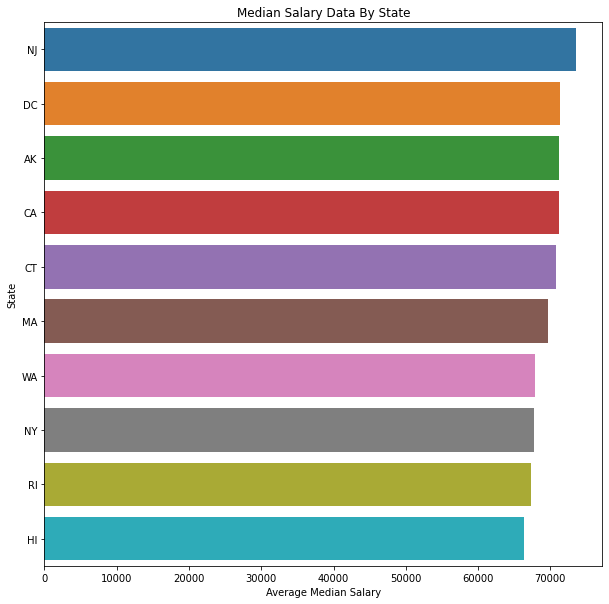

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Median Salary Data By State")
sns.barplot(y=top_states_for_da['State'], x=top_states_for_da["nTile50"])
plt.xlabel("Average Median Salary")

### What state has the most spread between the highest and lowest pay 

In [ ]:
riskiest_states = df_state.sort_values('Spread', ascending=False)[:10]
riskiest_states

,State,Spread,nTile10,nTile25,nTile50,nTile75,nTile90
29,NJ,"37,517.17","55,807.33","64,254.50","73,532.33","83,892.17","93,324.50"
7,DC,"36,394.00","54,135.00","62,329.00","71,329.00","81,379.00","90,529.00"
0,AK,"36,360.00","54,087.00","62,273.00","71,265.00","81,306.00","90,447.00"
4,CA,"36,321.15","54,028.28","62,206.03","71,188.11","81,217.85","90,349.43"
6,CT,"36,114.00","53,719.80","61,850.80","70,781.60","80,754.20","89,833.80"
18,MA,"35,529.20","52,850.60","60,850.00","69,636.40","79,447.60","88,379.80"
44,WA,"34,601.50","51,471.75","59,262.12","67,819.12","77,374.12","86,073.25"
32,NY,"34,545.80","51,386.80","59,165.00","67,707.80","77,247.60","85,932.60"
37,RI,"34,326.00","51,061.00","58,790.00","67,278.00","76,757.00","85,387.00"
10,HI,"33,889.00","50,410.00","58,040.00","66,421.00","75,779.00","84,299.00"


Text(0.5, 0, 'Spread')

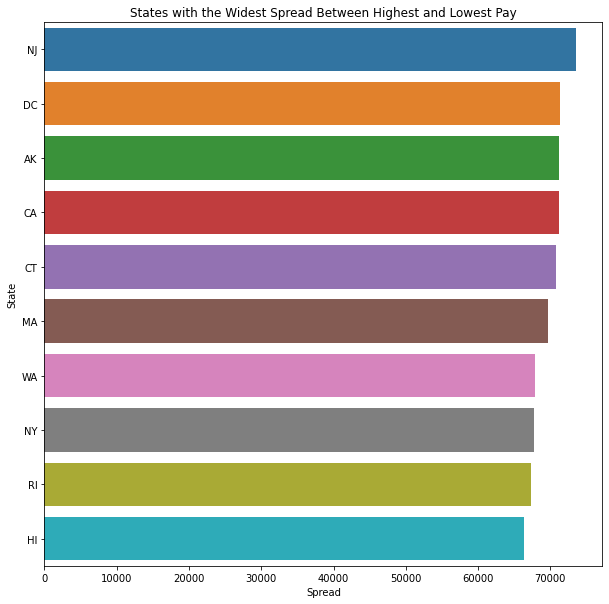

In [ ]:
plt.figure(figsize=(10,10))
plt.title("States with the Widest Spread Between Highest and Lowest Pay")
sns.barplot(y=top_states_for_da['State'], x=top_states_for_da["nTile50"])
plt.xlabel("Spread")